In [ ]:
# why is synthetic going up? 






In [ ]:
# maybe train-test split messed up for the ones that are high, so let's check
from pathlib import Path


low_dir = Path("~/resources/data/synthetic_two_function/seq2seq/500_5/")
high_dir = Path("~/resources/data/synthetic_two_function/seq2seq/1000_5/")


low_train_tgt = low_dir.joinpath("train.tgt")
high_train_tgt = high_dir.joinpath("train.tgt")
low_test_tgt = low_dir.joinpath("test.tgt")
high_test_tgt = high_dir.joinpath("test.tgt")

low_train_data = [x.strip() for x in open(low_train_tgt).readlines()]
high_train_data = [x.strip() for x in open(high_train_tgt).readlines()]
low_test_data = [x.strip() for x in open(low_test_tgt).readlines()]
high_test_data = [x.strip() for x in open(high_test_tgt).readlines()]

low_train_b = [x for x in low_train_data if "Func2" in x]
low_test_b = [x for x in low_train_data if "Func2" in x]

low_train_test_overlap = set(low_train_b) & set(low_test_b)

high_train_b = [x for x in high_train_data if "Func2" in x]
high_test_b = [x for x in high_train_data if "Func2" in x]

high_train_test_overlap = set(high_train_b) & set(high_test_b)






In [20]:
import pathlib
from collections import defaultdict 
import pandas as pd 
import seaborn as sns    
from matplotlib import pyplot as plt 

globs = pathlib.Path("/home/t-eliass/amlt_models/synthetic_two_function_exclude_min_pair/")

freqs = defaultdict(list)

for path in globs.glob("Func2_*/*/translate_output/test.tgt"):
    with open(path) as f1:
        lines = f1.readlines()
    setting = path.parent.parent.name
    num_error = len([x for x in lines if "Error" in x])
    total = len(lines)
    perc_error = num_error/total * 100

    freqs[setting].append(perc_error)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '500_1'),
  Text(1, 0, '500_5'),
  Text(2, 0, '500_10'),
  Text(3, 0, '500_20'),
  Text(4, 0, '500_50'),
  Text(5, 0, '1000_1'),
  Text(6, 0, '1000_5'),
  Text(7, 0, '1000_10'),
  Text(8, 0, '1000_20'),
  Text(9, 0, '1000_50'),
  Text(10, 0, '2000_1'),
  Text(11, 0, '2000_5'),
  Text(12, 0, '2000_10'),
  Text(13, 0, '2000_20'),
  Text(14, 0, '2000_50'),
  Text(15, 0, '5000_1'),
  Text(16, 0, '5000_5'),
  Text(17, 0, '5000_10'),
  Text(18, 0, '5000_20'),
  Text(19, 0, '5000_50'),
  Text(20, 0, '10000_1'),
  Text(21, 0, '10000_5'),
  Text(22, 0, '10000_10'),
  Text(23, 0, '10000_20'),
  Text(24, 0, '10000_50'),
  Text(25, 0, '12000_1'),
  Text(26, 0, '12000_5'),
  Text(27, 0, '12000_10'),
  Text(28, 0, '12000_20'),
  Text(29, 0, '12000_50')])

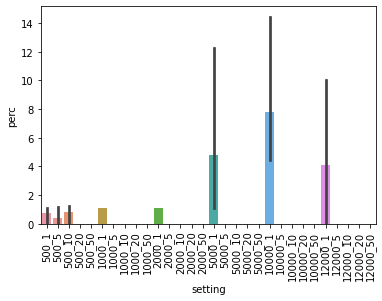

In [27]:
# data = pd.DataFrame.from_dict(freqs, orient='index', columns = ["index","setting", "percent error"])
data = pd.DataFrame.from_dict(freqs)
tidy_data = pd.melt(data, var_name="setting", value_name="perc")

tidy_data["setting_val"] = [int(x.split("_")[0]) + int(x.split("_")[1]) for x in tidy_data['setting']]

tidy_data = tidy_data.sort_values(['setting_val']).reset_index(drop=True)

# #, columns = ["setting", "percent error"])
fig, ax = plt.subplots()
sns.barplot(data=tidy_data, x = "setting", y = "perc", ax = ax)
plt.xticks(rotation=90)

In [28]:
 

globs = pathlib.Path("/home/t-eliass/amlt_models/synthetic_two_function_min_pair/")

freqs = defaultdict(list)

for path in globs.glob("Func2_*/*/translate_output/test.tgt"):
    with open(path) as f1:
        lines = f1.readlines()
    setting = path.parent.parent.name
    num_error = len([x for x in lines if "Error" in x])
    total = len(lines)
    perc_error = num_error/total * 100

    freqs[setting].append(perc_error)




# data = pd.DataFrame.from_dict(freqs, orient='index', columns = ["index","setting", "percent error"])
data = pd.DataFrame.from_dict(freqs)
tidy_data = pd.melt(data, var_name="setting", value_name="perc")

tidy_data["setting_val"] = [int(x.split("_")[0]) + int(x.split("_")[1]) for x in tidy_data['setting']]

tidy_data = tidy_data.sort_values(['setting_val']).reset_index(drop=True)

# #, columns = ["setting", "percent error"])
fig, ax = plt.subplots()
sns.barplot(data=tidy_data, x = "setting", y = "perc", ax = ax)
plt.xticks(rotation=90)